In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

## load data

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
# # metadata 
# print(wine.metadata) 
# # variable information 
# print(wine.variables) 

In [3]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [6]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
X.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [8]:
X.duplicated().sum()

0

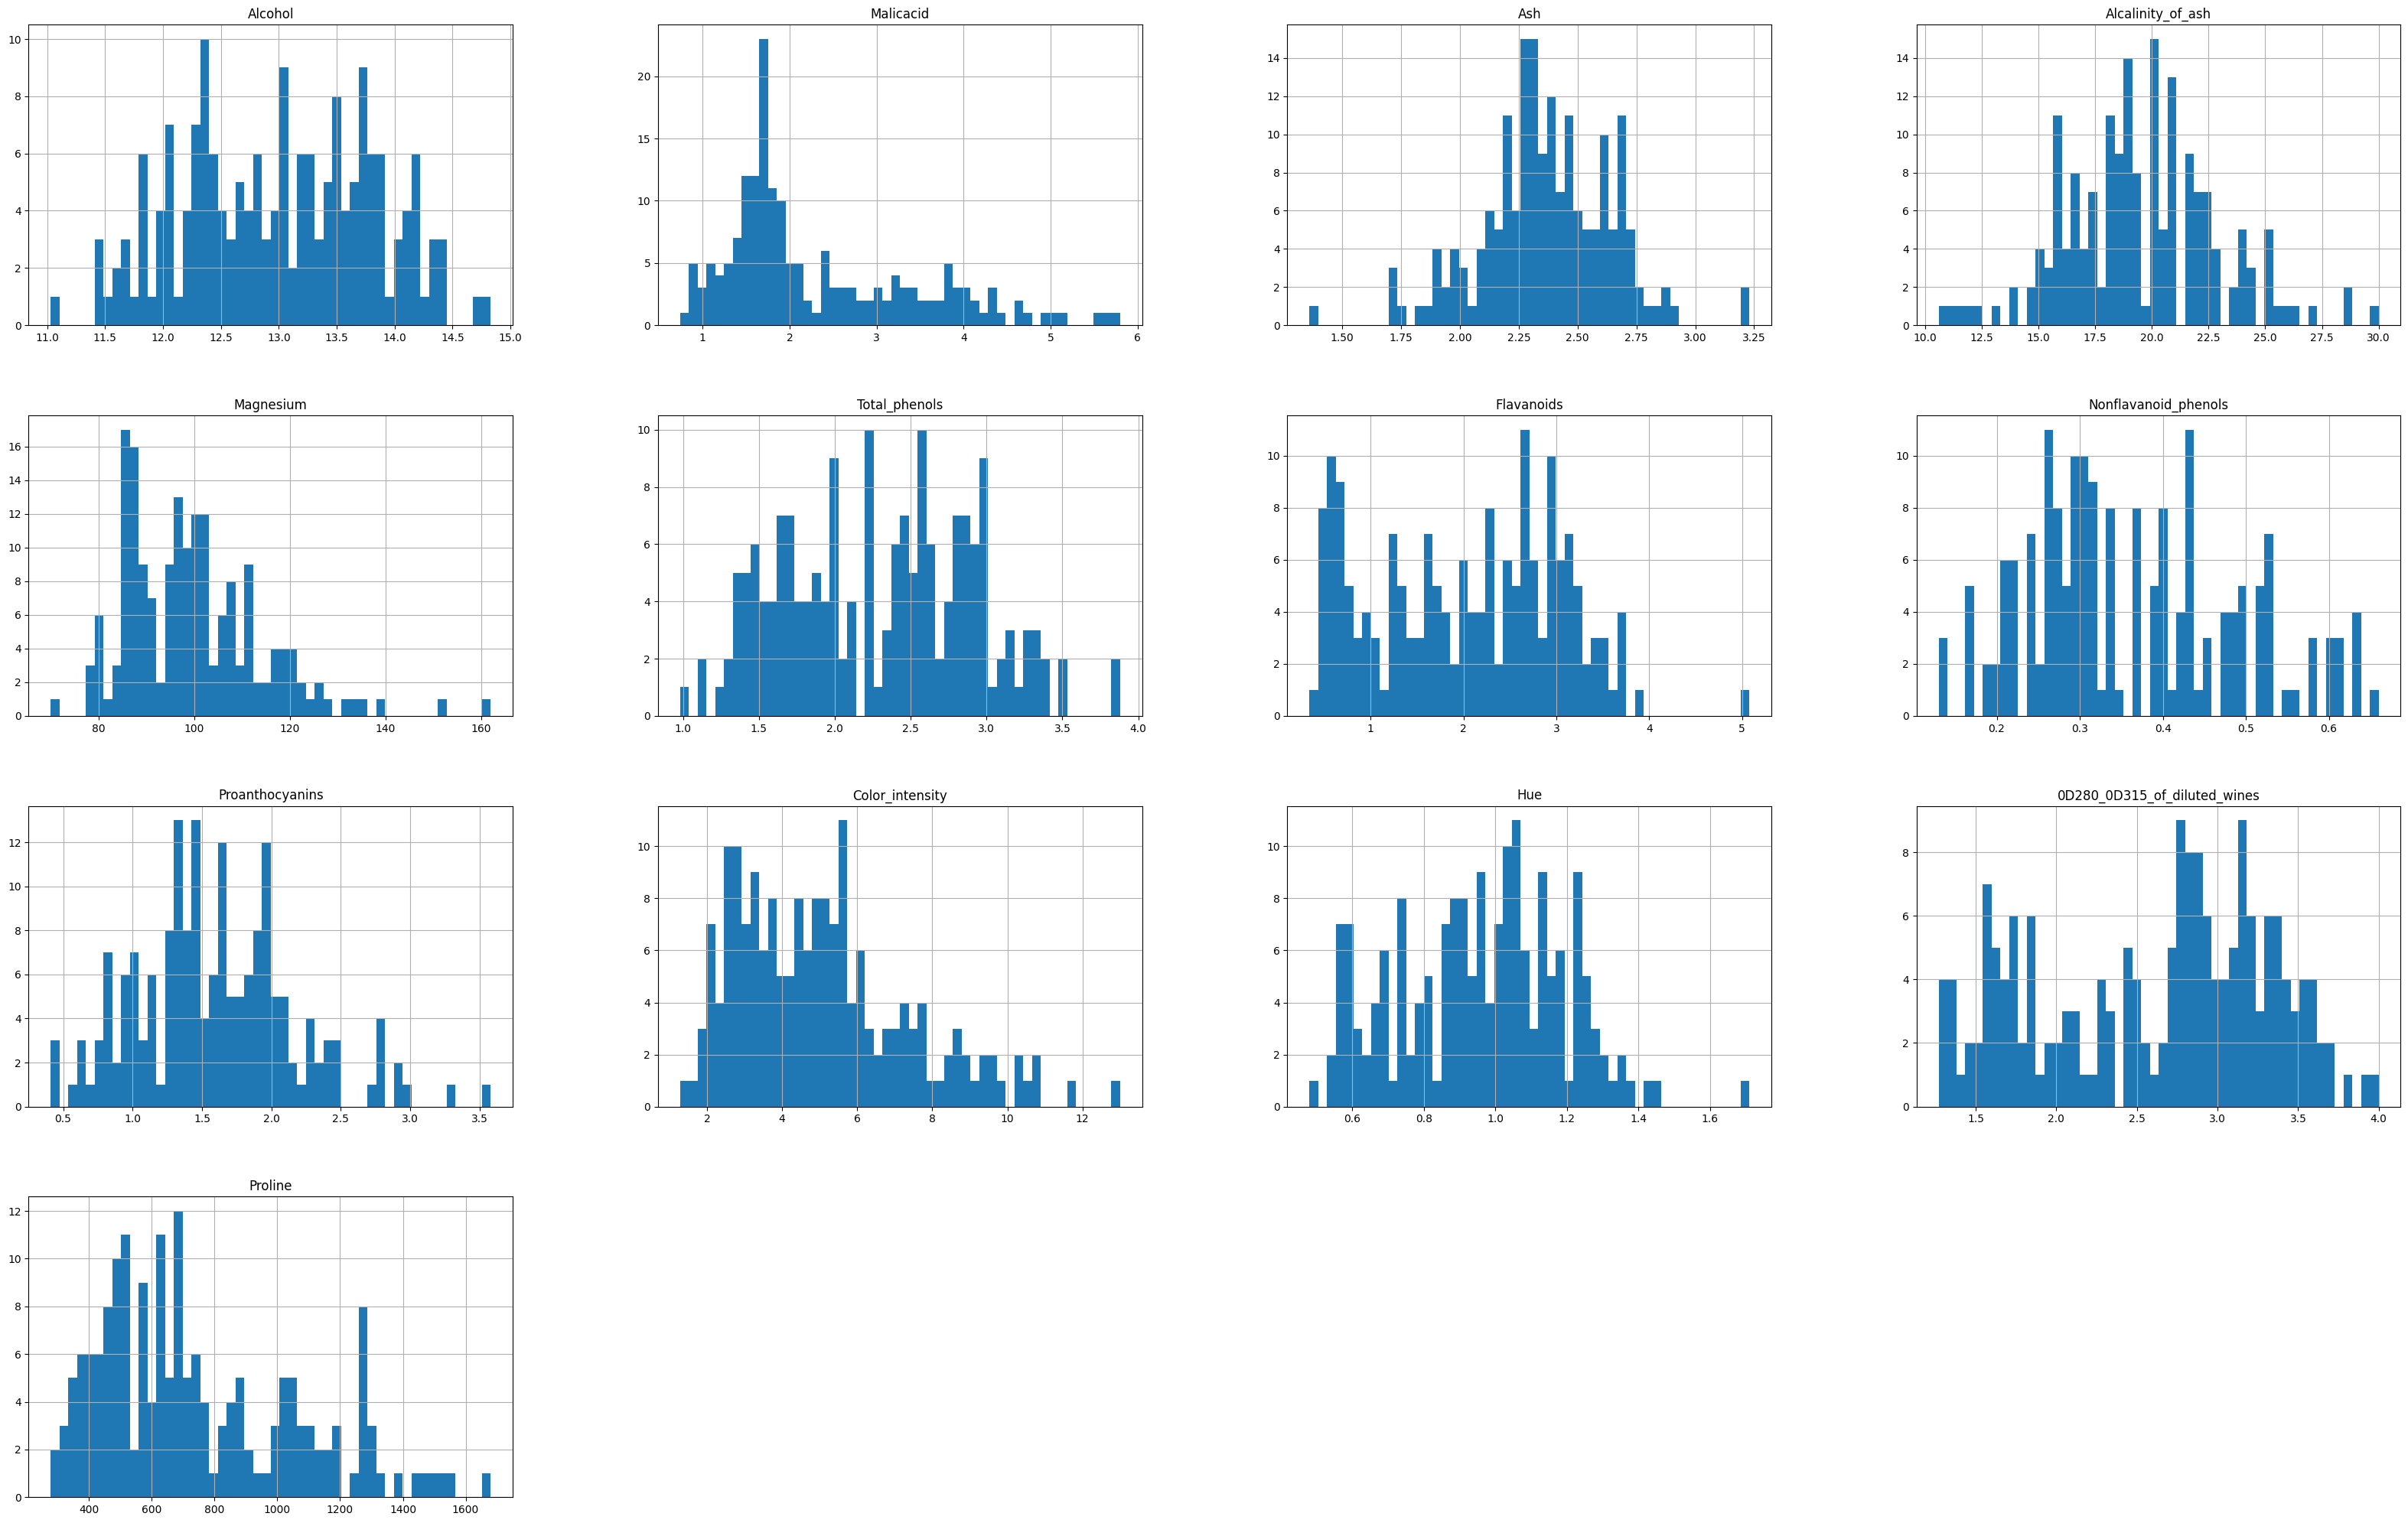

In [9]:
X.hist(bins=50, figsize=(40, 25))
plt.show()

<Axes: >

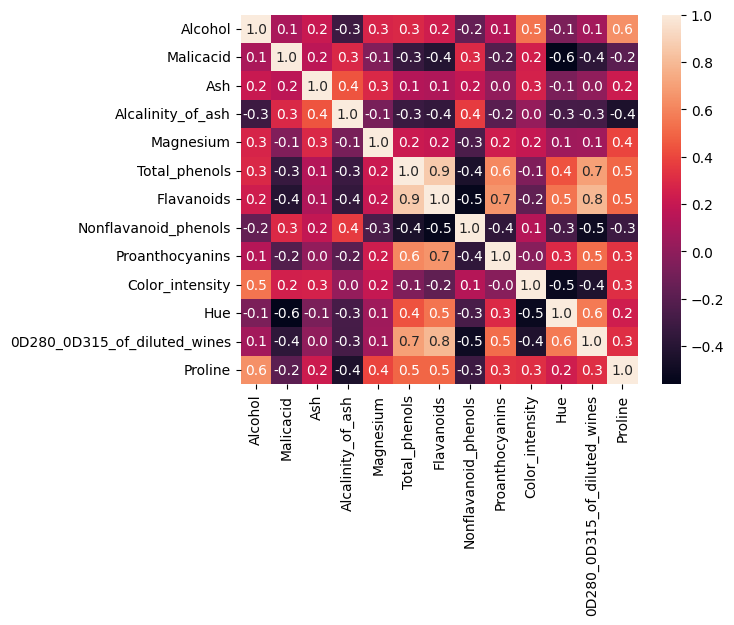

In [10]:
correlation = X.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".1f")

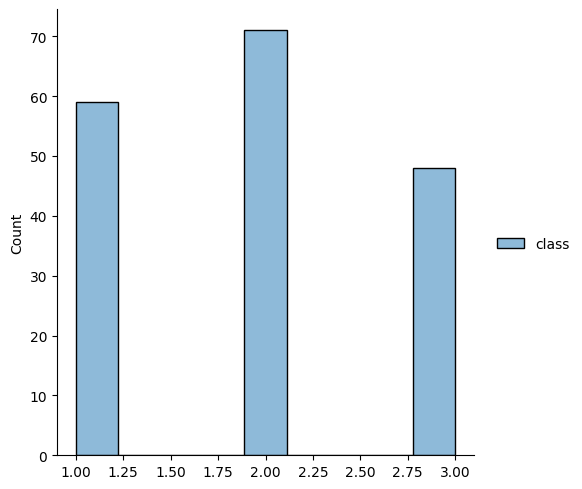

In [11]:
sns.displot(y)

## splitting data

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 22 to 102
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       119 non-null    float64
 1   Malicacid                     119 non-null    float64
 2   Ash                           119 non-null    float64
 3   Alcalinity_of_ash             119 non-null    float64
 4   Magnesium                     119 non-null    int64  
 5   Total_phenols                 119 non-null    float64
 6   Flavanoids                    119 non-null    float64
 7   Nonflavanoid_phenols          119 non-null    float64
 8   Proanthocyanins               119 non-null    float64
 9   Color_intensity               119 non-null    float64
 10  Hue                           119 non-null    float64
 11  0D280_0D315_of_diluted_wines  119 non-null    float64
 12  Proline                       119 non-null    int64  
dtypes: float6

In [14]:
X_train.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,12.971008,2.413361,2.372101,19.577311,100.857143,2.278319,2.014538,0.364034,1.588739,5.025126,0.956353,2.593782,741.588235
std,0.851975,1.107837,0.268258,3.506735,15.167587,0.662930,1.020149,0.127201,0.578687,2.203922,0.236996,0.734598,307.645195
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.290000,1.645000,2.235000,17.450000,88.000000,1.690000,1.145000,0.270000,1.245000,3.230000,0.770000,1.825000,497.500000
50%,12.960000,1.900000,2.360000,19.500000,98.000000,2.300000,2.140000,0.340000,1.560000,4.800000,0.960000,2.780000,660.000000
75%,13.710000,3.170000,2.525000,21.500000,108.000000,2.815000,2.870000,0.450000,1.935000,6.165000,1.120000,3.170000,961.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,10.800000,1.710000,4.000000,1547.000000


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 19 to 93
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       59 non-null     float64
 1   Malicacid                     59 non-null     float64
 2   Ash                           59 non-null     float64
 3   Alcalinity_of_ash             59 non-null     float64
 4   Magnesium                     59 non-null     int64  
 5   Total_phenols                 59 non-null     float64
 6   Flavanoids                    59 non-null     float64
 7   Nonflavanoid_phenols          59 non-null     float64
 8   Proanthocyanins               59 non-null     float64
 9   Color_intensity               59 non-null     float64
 10  Hue                           59 non-null     float64
 11  0D280_0D315_of_diluted_wines  59 non-null     float64
 12  Proline                       59 non-null     int64  
dtypes: float64(

## scaling

In [16]:
X_train_numerical = X_train.select_dtypes(include=[np.number])
X_test_numerical = X_test.select_dtypes(include=[np.number])

In [17]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [18]:
X_train_scale = scale.transform(X_train_numerical)
X_test_scale = scale.transform(X_test_numerical)

## training

In [19]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train_scale,y_train)

/home/ubuntu/mapsa/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [20]:
log_reg.coef_

array([[ 0.78468983,  0.11049523,  0.44933607, -0.83637175,  0.04708542,
         0.35367888,  0.51622324, -0.04573609,  0.20092856,  0.16001311,
         0.07485755,  0.60140599,  0.89864785],
       [-1.02418548, -0.29362067, -0.82257448,  0.71180864, -0.10945195,
        -0.16509604,  0.34446506,  0.08036234,  0.37274197, -0.81935374,
         0.72782535,  0.12710915, -0.96284127],
       [ 0.23949564,  0.18312544,  0.37323841,  0.12456311,  0.06236653,
        -0.18858284, -0.8606883 , -0.03462625, -0.57367054,  0.65934063,
        -0.80268289, -0.72851515,  0.06419341]])

## evaluating

In [21]:
y_predict = log_reg.predict(X_test_scale)
y_predict

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 3,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2])

In [22]:
confusion_matrix(y_test,y_predict)

array([[20,  0,  0],
       [ 0, 23,  1],
       [ 0,  0, 15]])

In [23]:
accuracy_score(y_test,y_predict)

0.9830508474576272